In [1]:
import skgeom as sg
from skgeom.draw import draw
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
from matplotlib import cm


In [49]:
v = np.array([
    sg.Point3(1.,0.,0.),
    sg.Point3(1.,1.,0.),
    sg.Point3(1.,0.,1.),
    sg.Point3(0.,0.,0.)
])
f = np.array([[0,3,1], [0,1,2], [1,3,2], [3,0,2]], dtype=int)

v2 = np.array([
    sg.Point3(2.,0.,0.),
    sg.Point3(2.,1.,0.),
    sg.Point3(2.,0.,2.),
    sg.Point3(0.,0.,0.)
])

v3 = np.array([
    sg.Point3(0,0,0), #0
    sg.Point3(1,0,0), #1
    sg.Point3(1,1,0), #2
    sg.Point3(0,1,0), #3
    sg.Point3(0,0,1), #4
    sg.Point3(1,0,1), #5
    sg.Point3(1,1,1), #6
    sg.Point3(0,1,1)  #7
])

f3 = np.array([
    [0,2,1], # unten
    [0,3,2],
    [0,1,5], # vorn
    [0,5,4],
    [1,2,6], # rechts
    [1,6,5],
    [2,3,7], # hinten
    [2,7,6],
    [3,0,4], # links
    [3,4,7],
    [4,5,6], # oben
    [4,6,7]
])

In [50]:
P = sg.polyhedron_from_vertices_and_vertex_indices(v, f)
P2 = sg.polyhedron_from_vertices_and_vertex_indices(v2, f)
PQ = sg.polyhedron_from_vertices_and_vertex_indices(v3, f3)


In [47]:
PQ.is_closed()

True

In [53]:
N = sg.NefPolyhedron3(P)
N2 = sg.NefPolyhedron3(P2)
NQ = sg.NefPolyhedron3(PQ)
N3 = N2.intersection(N)
N4 = NQ.difference(N)

In [58]:
NQ + N

TypeError: unsupported operand type(s) for +: 'skgeom._skgeom.NefPolyhedron3' and 'skgeom._skgeom.NefPolyhedron3'

In [57]:
N.to_polyhedron()

In [54]:
N4.to_polyhedron()

In [11]:
draw(N3.to_polyhedron(), color='C0')
# plt.gca().set_xlim(0,20)
# plt.gca().set_ylim(0,20)
plt.show()


In [20]:
%matplotlib qt
from ipywidgets import interact, fixed

def plot_3D():
    draw(N4.to_polyhedron(), color='C0')

interact(plot_3D)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.plot_3D()>

In [4]:
vertices = np.array([[v.point()[0], v.point()[1], v.point()[2]] for v in P.vertices], dtype=float)
points = np.array([v.point()for v in P.vertices])

In [5]:
points[0].numpy()

array([1., 0., 0.])

In [6]:
idx = []

for f in P.facets:
    fidx = []
    fidx.append(np.argwhere(f.halfedge().vertex().point() == points)[0,0])
    fidx.append(np.argwhere(f.halfedge().next().vertex().point() == points)[0,0])
    fidx.append(np.argwhere(f.halfedge().next().next().vertex().point() == points)[0,0])

    idx.append(fidx)

In [7]:
idx2 = []
for f in P.facets:
    fidx = []
    h = f.halfedge()
    fidx.append(h.vertex().point().numpy())
    for _ in range(3):
        fidx.append(h.next().vertex().point().numpy())
        h = h.next()
        
    idx2.append(fidx)

In [8]:
idx2 = np.array(idx2)
idx2

array([[[1., 1., 0.],
        [1., 0., 0.],
        [0., 0., 0.],
        [1., 1., 0.]],

       [[1., 0., 1.],
        [1., 0., 0.],
        [1., 1., 0.],
        [1., 0., 1.]],

       [[1., 0., 1.],
        [1., 1., 0.],
        [0., 0., 0.],
        [1., 0., 1.]],

       [[1., 0., 1.],
        [0., 0., 0.],
        [1., 0., 0.],
        [1., 0., 1.]]])

In [19]:
draw(P, linestyle='--')

AttributeError: Figure.set() got an unexpected keyword argument 'linestyle'

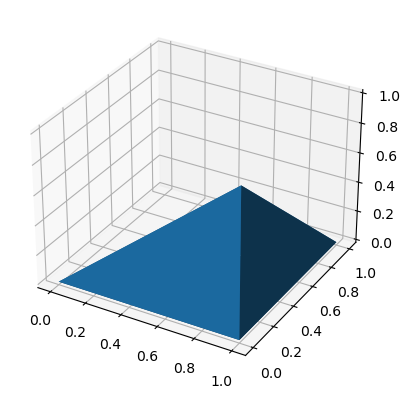

In [22]:


# fig = plt.figure(figsize=plt.figaspect(0.5))
# ax = fig.add_subplot(1, 1, 1)
fig, ax = plt.subplots(1,1, subplot_kw={'projection': '3d'})
cmap = None
cmap = cmap if cmap else None
ax.plot_trisurf(vertices[:,0], vertices[:,1], vertices[:,2], triangles = idx, cmap = cmap)

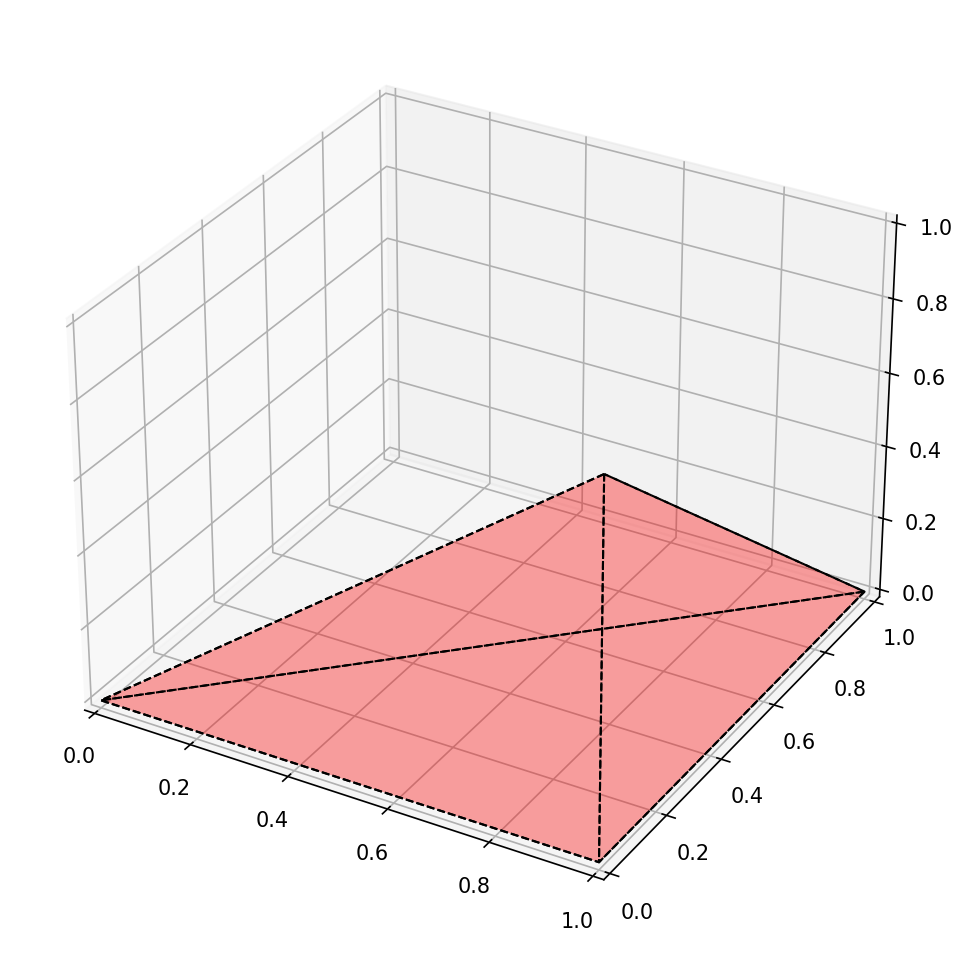

In [32]:
from mpl_toolkits import mplot3d
fig, ax = plt.subplots(1,1, figsize=(8,8), dpi=150, subplot_kw={'projection': '3d'})
cmap = None
cmap = cmap if cmap else None

ax.add_collection3d(mplot3d.art3d.Poly3DCollection(idx2, facecolors='r', linewidths=1, alpha=0.2))
ax.add_collection3d(mplot3d.art3d.Line3DCollection(idx2, colors='k', linewidths=1, linestyles='--'))


In [29]:
vertices

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [0., 0., 0.]])